# Stats Model Linear Regression with the Sacramento Real Estate Data

In [11]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [1]:
shd_csv = './datasets/sacramento_real_estate_transactions_Clean.csv'

In [2]:
shd = pd.read_csv(shd_csv)

In [3]:
shd.head()

,Unnamed: 0,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
shd.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
shd['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [6]:
type_dummy = pd.get_dummies(shd['type'])
type_dummy.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [7]:
type_dummy.drop('Unkown', axis=1, inplace=True)
shd = pd.concat([shd, type_dummy], axis=1)
shd.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Condo,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1


In [8]:
shd.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude,Condo,Multi-Family,Residential
zip,1.000000,0.126991,0.070100,0.130574,-0.093232,-0.290980,-0.539411,0.012774,0.040465,-0.026538
beds,0.126991,1.000000,0.839594,0.684261,0.342152,-0.291029,-0.055671,-0.225422,0.137088,0.148876
baths,0.070100,0.839594,1.000000,0.665654,0.416225,-0.235535,0.015656,-0.141862,0.167995,0.058997
sq__ft,0.130574,0.684261,0.665654,1.000000,0.333861,-0.383172,-0.178280,-0.156376,0.099251,0.101372
price,-0.093232,0.342152,0.416225,0.333861,1.000000,-0.039506,0.284472,-0.146978,-0.008056,0.134179
latitude,-0.290980,-0.291029,-0.235535,-0.383172,-0.039506,1.000000,0.388637,0.050203,-0.007730,-0.042480
longitude,-0.539411,-0.055671,0.015656,-0.178280,0.284472,0.388637,1.000000,-0.012092,0.002394,-0.003901
Condo,0.012774,-0.225422,-0.141862,-0.156376,-0.146978,0.050203,-0.012092,1.000000,-0.027607,-0.882694
Multi-Family,0.040465,0.137088,0.167995,0.099251,-0.008056,-0.007730,0.002394,-0.027607,1.000000,-0.428065
Residential,-0.026538,0.148876,0.058997,0.101372,0.134179,-0.042480,-0.003901,-0.882694,-0.428065,1.000000


In [29]:
def heatmap(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(15,8))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    title = 'Heatmap'
    ax = sns.heatmap(corrs, mask=mask, annot=True, fmt='.2f', annot_kws={'size':10},
                     cmap='RdBu_r', center=0, vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})
    ax.set_title(title, fontsize=12)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=60)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=12) 
    plt.show() 

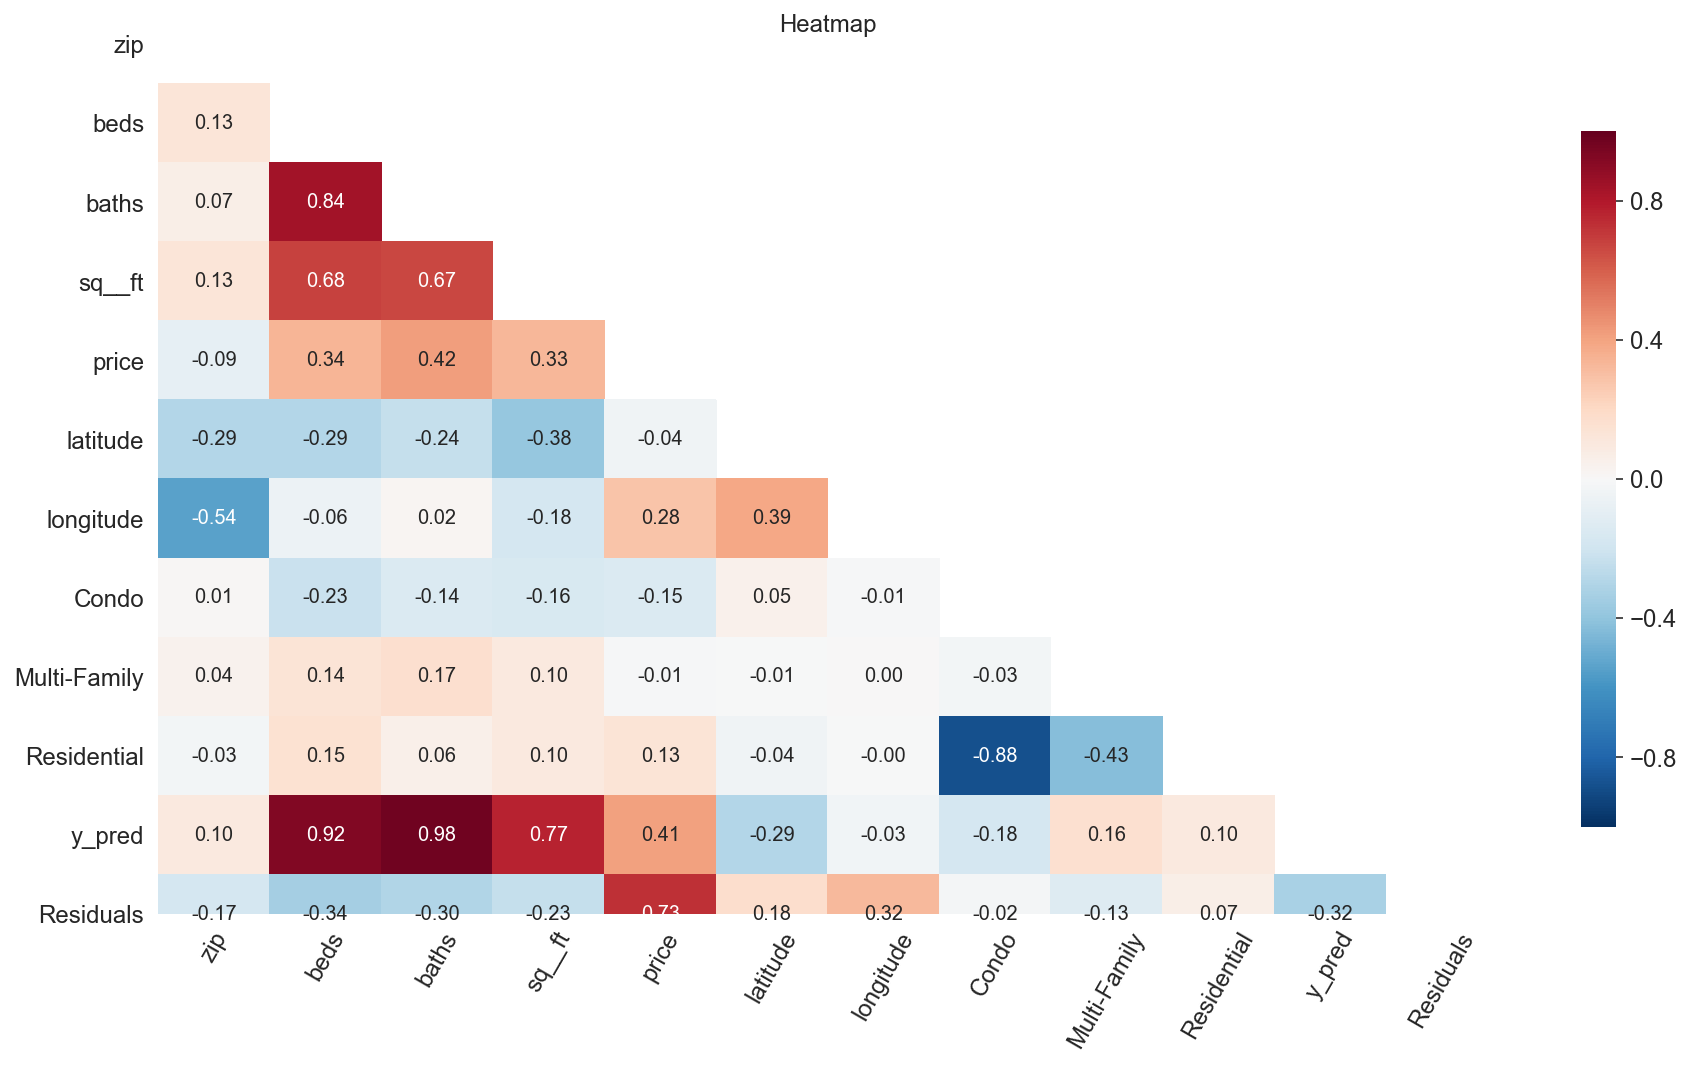

In [30]:
heatmap(shd)

In [13]:
import statsmodels.api as sm

X = shd[['sq__ft','beds','baths']]
y = shd['price']

model = sm.OLS(y, X).fit()

y_pred = model.predict(X)

In [14]:
shd['y_pred'] = y_pred
shd['Residuals'] = shd['price'] - shd['y_pred']

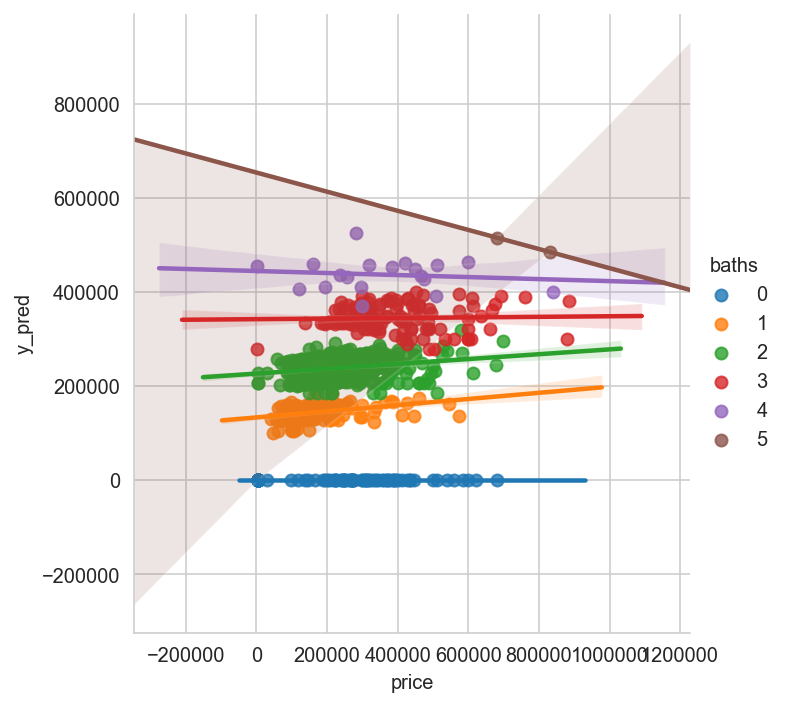

In [15]:
import seaborn as sns
%matplotlib inline

sns.lmplot(x='price', y='y_pred', data=shd, hue='baths')

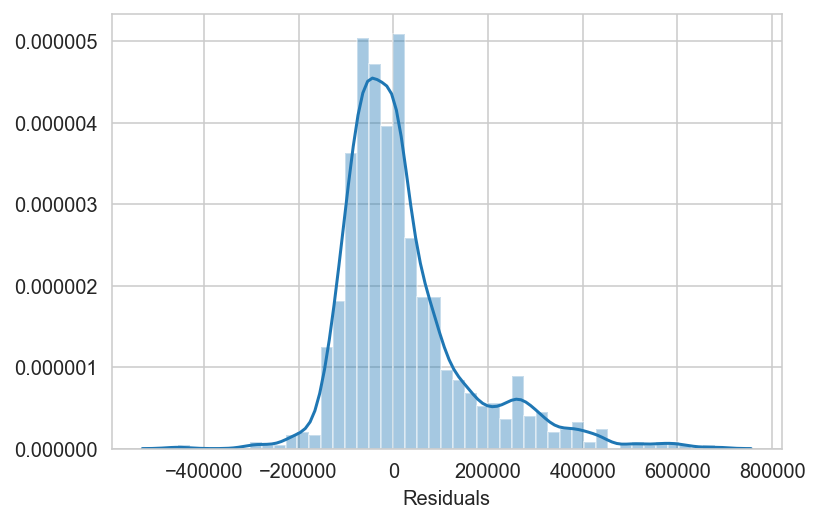

In [16]:
sns.distplot(shd['Residuals'])

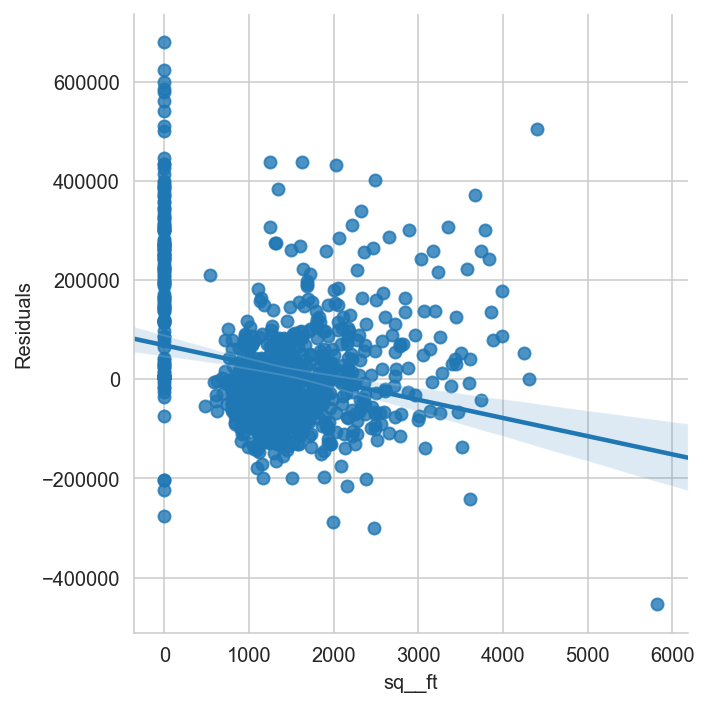

In [17]:
sns.lmplot(x='sq__ft', y='Residuals', data=shd)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.754
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              1005.
Date:                Sat, 09 Nov 2019   Prob (F-statistic):                   1.48e-298
Time:                        21:48:23   Log-Likelihood:                         -13019.
No. Observations:                 984   AIC:                                  2.604e+04
Df Residuals:                     981   BIC:                                  2.606e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft        18.3935      7.108      2.588      0.010       4.445      32.342
beds        2.188e+04   5829.252      3.753      0.000    1.04e+04    3.33e+04
baths       7.086e+04   9060.952      7.821      0.000    5.31e+04    8.86e+04
==============================================================================
Omnibus:                      288.863   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              792.324
Skew:                           1.500   Prob(JB):                    8.89e-173
Kurtosis:                       6.214   Cond. No.                     3.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""